In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f = pd.read_csv('fake_news_dataset.csv')

In [3]:
f.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [4]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [5]:
f.describe()

,title,text,date,source,author,category,label
count,20000,20000,20000,19000,19000,20000,20000
unique,20000,20000,1096,8,17051,7,2
top,Foreign Democrat final.,more tax development both store agreement lawy...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,32,2439,12,2922,10056


In [6]:
f.isnull().sum()

title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
dtype: int64

In [7]:
f.duplicated().sum()

0

In [8]:
f.shape

(20000, 7)

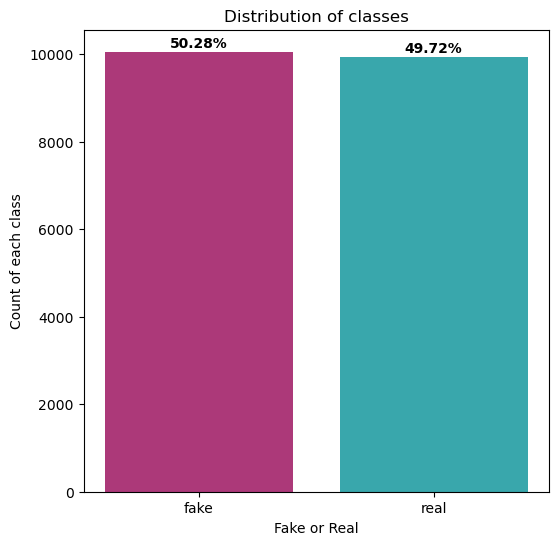

In [9]:
bar = f['label'].value_counts().rename_axis('Subclass').reset_index(name = 'counts')
total = bar['counts'].sum()
percentage= []
for i in range(bar.shape[0]):
    pct = (bar.counts[i]/total)*100
    percentage.append(round(pct,2))
bar['Percentage'] = percentage


plt.figure(num = 1, figsize= (6,6))
c_list = ['#AC3979','#39A7AC','#39AC79']
graph = plt.bar(bar.Subclass, bar.counts, color = c_list)
plt.xlabel("Fake or Real")
plt.ylabel('Count of each class')
plt.xticks([0,1])
       
plt.title("Distribution of classes")

i = 0 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(bar.Percentage[i])+ '%', ha = 'center', weight = 'bold')
    i = i+1
plt.show()

In [10]:
f.dtypes

title       object
text        object
date        object
source      object
author      object
category    object
label       object
dtype: object

In [40]:
# get all categorical columns in the dataframe
catCols = [col for col in f.columns if f[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    f[item] = lb_make.fit_transform(f[item])

In [41]:
from scipy import stats
z_scores = stats.zscore(f)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_f = f[filtered_entries]

new_f.head()

,title,text,date,source,author,category,label
0,6552,10659,318,5,13139,3,1
1,17956,13235,29,3,8293,3,0
2,7671,17462,128,1,8557,0,0
3,19931,12629,287,6,12225,4,0
4,2167,19577,342,1,1464,6,0


In [42]:
f.isnull().sum()

title       0
text        0
date        0
source      0
author      0
category    0
label       0
dtype: int64

In [43]:
new_f.isnull().sum()

title       0
text        0
date        0
source      0
author      0
category    0
label       0
dtype: int64

In [44]:
new_f.duplicated().sum()

0

In [45]:
def Standard_Scaler(X):
    new = X - np.mean(X, axis=0)
    scale = new / np.std(new, axis=0)
    return scale

In [47]:
X = new_f.drop('label', axis =1)
y = new_f['label']
X = Standard_Scaler(X)

# l1 l2 regularization
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [48]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [49]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [50]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1] ## number of samples
    n = X_train.shape[0] ## columns size
    
    W = np.ones((n,2)) # initializing weights
    B = 0 ## bias initial
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B # linear calculation
        A = sigmoid(Z) # sigmoid transformation
        
        # cost function
        cost1 = Y*np.log(A)
        cost2 = (1-Y)*np.log(1-A)
        cost = -1/m*(np.sum(cost1 +cost2))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T) ## changing weights
        dB = (1/m)*np.sum(A - Y) # chanding bias
        
        W = W - learning_rate*dW.T ## changed
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [83]:
iteration = 1000 
lr = 0.03
W, B, cost_list = model(X_train, y_train, lr, iteration)

cost after  0 iteration is :  2.431052752703652
cost after  100 iteration is :  1.87558883514983
cost after  200 iteration is :  1.5539942119558405
cost after  300 iteration is :  1.4301413205292988
cost after  400 iteration is :  1.3961340289085684
cost after  500 iteration is :  1.3881113262504052
cost after  600 iteration is :  1.3862987600472008
cost after  700 iteration is :  1.3858932429682613
cost after  800 iteration is :  1.3858026832639896
cost after  900 iteration is :  1.3857824609846494


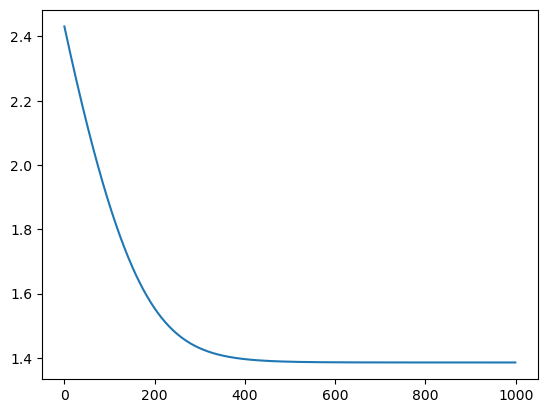

In [84]:
plt.plot(np.arange(iteration), cost_list)
plt.show()

In [102]:
def accuracy(X, Y, W, B):
    ## Calculating
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [103]:
accuracy(X_test, y_test, W, B)

Accuracy of the model is :  1.95 %
